2.1 Exercise - 1

1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

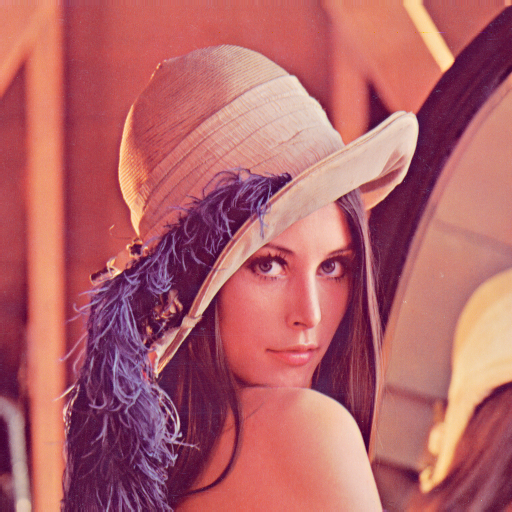

In [ ]:
from PIL import Image
# display image in colab
image_colored = Image . open ("/content/drive/MyDrive/Lenna_(test_image).png")
display ( image_colored )

2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

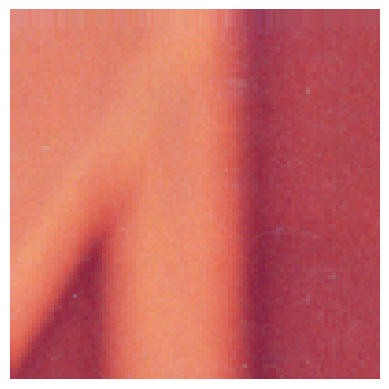

In [ ]:
# Convert image to NumPy array
image_array = np.array(image_colored)

# Extract the top-left 100x100 pixels
top_left_corner = image_array[:100, :100]

# Display the extracted region
plt.imshow(top_left_corner)
plt.axis("off")  # Hide axes
plt.show()


3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

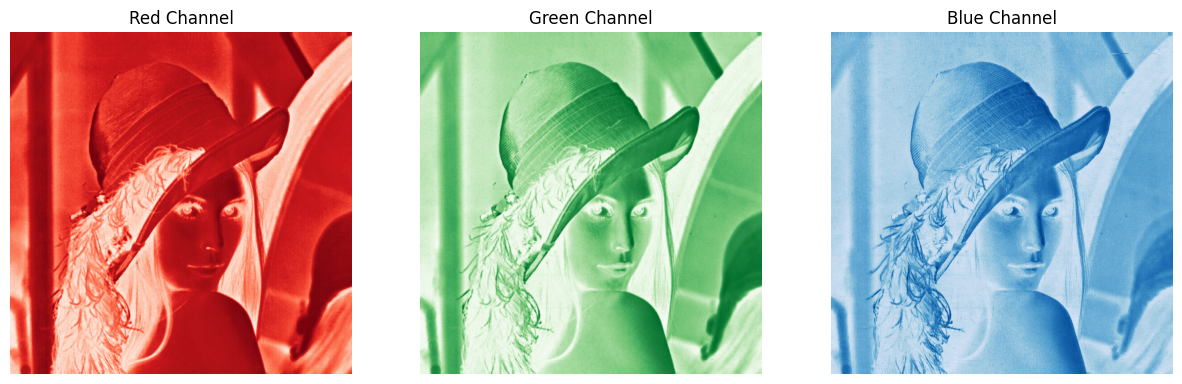

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Open the image
image_colored = Image.open("/content/drive/MyDrive/Lenna_(test_image).png")



# Convert image to NumPy array
image_array_colored = np.array(image_colored)

R = image_array[:, :, 0]  # Red channel
G = image_array[:, :, 1]  # Green channel
B = image_array[:, :, 2]  # Blue channel

# Display the three color channels separately using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Red Channel
axes[0].imshow(R, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

#Green Channel
axes[1].imshow(G, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis("off")

#Blue Channel
axes[2].imshow(B, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

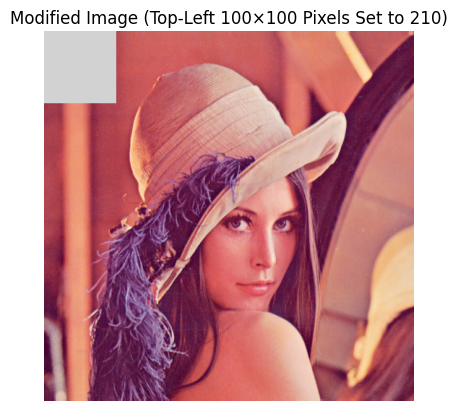

In [ ]:
# Convert the image to a NumPy array
image_array_colored = np.array(image_colored)

# Modify the top-left 100×100 pixels to a light gray value (210)
image_array_colored[:100, :100] = 210  # Assigning the value to all three channels

# Convert back to an image
modified_image = Image.fromarray(image_array_colored)

# Display the modified image
plt.imshow(modified_image)
plt.title("Modified Image (Top-Left 100×100 Pixels Set to 210)")
plt.axis("off")  # Hide axes
plt.show()

2.2 Exercise - 2:
Complete all the Task.
1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

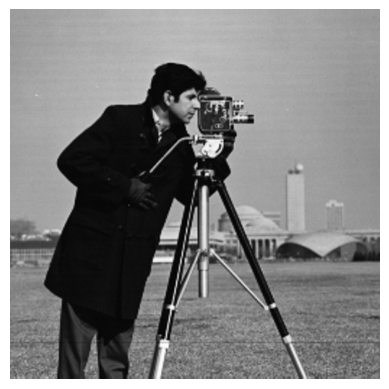

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_gray = Image.open ('/content/drive/MyDrive/cameraman.png')
image_array_grayed = np . array (image_gray)
plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

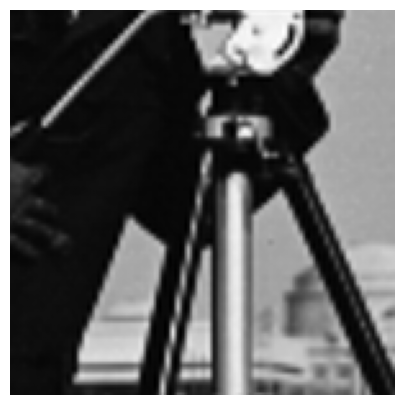

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Convert image to NumPy array
image_gray_array = np.array(image_gray)
height, width = image_gray_array.shape
center_y, center_x = height // 2, width // 2

half_size = 75
start_y, end_y = center_y - half_size, center_y + half_size
start_x, end_x = center_x - half_size, center_x + half_size

middle_section = image_gray_array[start_y:end_y, start_x:end_x]
middle_image = Image.fromarray(middle_section)

plt.figure(figsize=(5, 5))
plt.imshow(middle_image, cmap="gray")
plt.axis("off")
plt.show()

3.Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

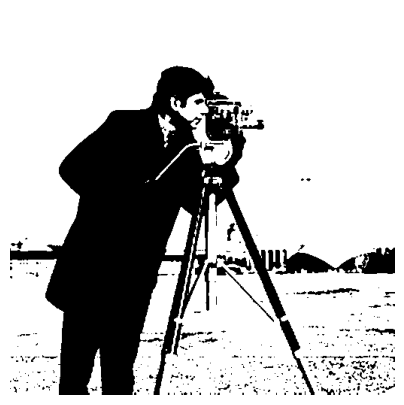

In [ ]:
image_gray_array = np.array(image_gray)

# Apply threshold: pixels below 100 set to 0, above 100 set to 255
binary_image_array = np.where(image_gray_array < 100, 0, 255)

# Convert the binary image array back to an Image object
binary_image = Image.fromarray(binary_image_array.astype(np.uint8))

# Display the resulting binary image
plt.figure(figsize=(5, 5))
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

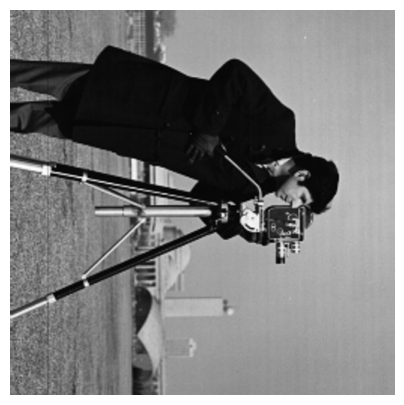

In [ ]:
rotated_image = image_gray.rotate(-90)  # Negative value for clockwise rotation

# Display the rotated image
plt.figure(figsize=(5, 5))
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

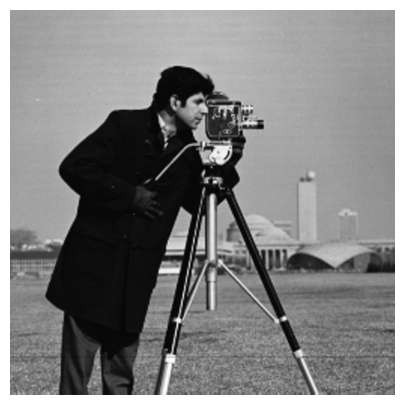

In [ ]:
image_rgb = image_gray.convert("RGB")

# Display the converted RGB image
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

3 Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

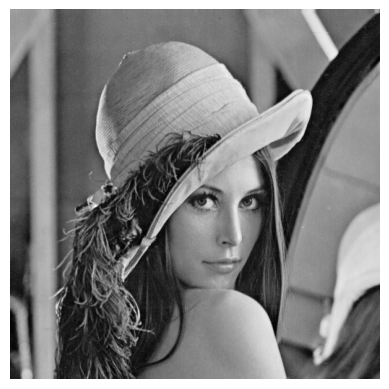

In [ ]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# display image in colab
image = Image . open ("/content/drive/MyDrive/lena_gray.gif")

#Load the image and convert to grayscale
image = image.convert('L')
image_array = np.array(image)
#Original image
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

#Standardize the data
mean = np.mean(image_array, axis=1, keepdims=True)
centered_data = image_array - mean

#Calculate the covariance matri
cov_matrix = np.cov(centered_data.T)

2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

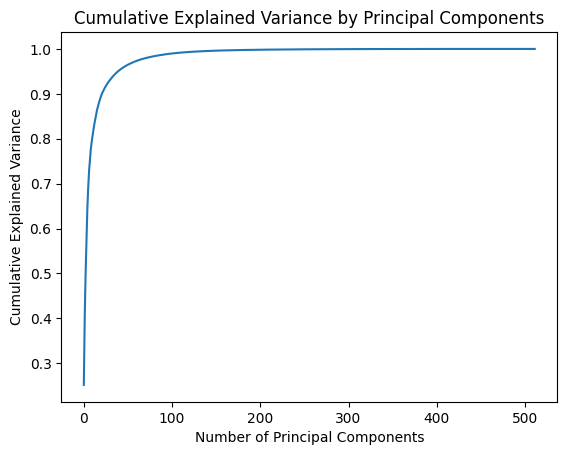

In [ ]:
# Eigen decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues in descending order and get corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Compute the explained variance ratio
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Compute the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(cumulative_explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.show()

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

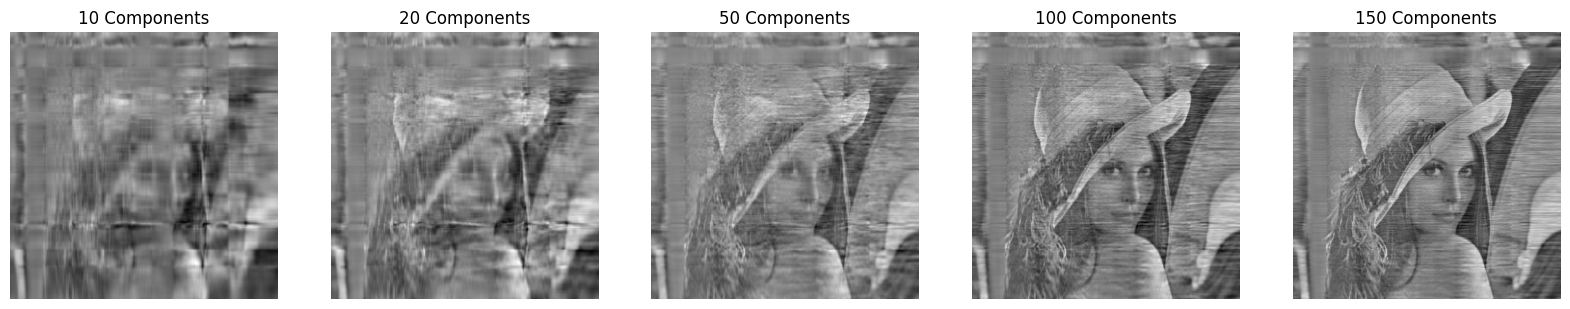

In [ ]:
def reconstruct_image(k):
    # Select the top k eigenvectors
    top_k_eigenvectors = sorted_eigenvectors[:, :k]
    transformed_data = np.dot(top_k_eigenvectors.T, centered_data)
    reconstructed_data = np.dot(top_k_eigenvectors, transformed_data) + mean
    return reconstructed_data

# Experiment with different values of k
k_values = [10, 20, 50, 100, 150]

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))

#Loop through the k values, reconstruct the image, and plot the results
for i, k in enumerate(k_values):
    reconstructed_image = reconstruct_image(k)

    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f'{k} Components')
    axes[i].axis('off')

plt.show()